<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-digitize()-method:" data-toc-modified-id="Using-the-digitize()-method:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the digitize() method:</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Using-scipy:" data-toc-modified-id="Using-scipy:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using scipy:</a></span><ul class="toc-item"><li><span><a href="#What-is-binned_statistic-doing?" data-toc-modified-id="What-is-binned_statistic-doing?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is binned_statistic doing?</a></span></li></ul></li><li><span><a href="#Using-Pandas-Cut" data-toc-modified-id="Using-Pandas-Cut-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using Pandas Cut</a></span></li></ul></div>

# Data Discretization with Binning
 
Binning aims to discretise continuous values into discrete bins. We explain in the following different ways for implementing  binning with Python.  

## Using the digitize() method:

In [1]:
import numpy as np
np.random.seed(1234) # make it reproducible

n = 100 # how much data
data = np.random.random(n) # n random numbers on 0..1

bins = np.linspace(0, 1, 11) # equally spaced bins, from 0 to 1.0 
# 11 bin 'edges' or boundaries, gives us 10 bins

digitized = np.digitize(data, bins) # put the n in the b


In [2]:
len(bins), bins # there are 11 bin boundaries or 'edges', i.e. 10 bins 
# 0 to 0.1... 0.9, 1.0 i.e. 10 bins, it's tidier

(11, array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [3]:
data

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263,
       0.35781727, 0.50099513, 0.68346294, 0.71270203, 0.37025075,
       0.56119619, 0.50308317, 0.01376845, 0.77282662, 0.88264119,
       0.36488598, 0.61539618, 0.07538124, 0.36882401, 0.9331401 ,
       0.65137814, 0.39720258, 0.78873014, 0.31683612, 0.56809865,
       0.86912739, 0.43617342, 0.80214764, 0.14376682, 0.70426097,
       0.70458131, 0.21879211, 0.92486763, 0.44214076, 0.90931596,
       0.05980922, 0.18428708, 0.04735528, 0.67488094, 0.59462478,
       0.53331016, 0.04332406, 0.56143308, 0.32966845, 0.50296683,
       0.11189432, 0.60719371, 0.56594464, 0.00676406, 0.61744171,
       0.91212289, 0.79052413, 0.99208147, 0.95880176, 0.79196414,
       0.28525096, 0.62491671, 0.4780938 , 0.19567518, 0.38231745,
       0.05387369, 0.45164841, 0.98200474, 0.1239427 , 0.1193809 ,
       0.73852306, 0.58730363, 0.47163253, 0.10712682, 0.22921

In [4]:
data.min(), data.max(), data.mean(), data.std()

(0.006208516587129398,
 0.9920814661883615,
 0.5183629078788025,
 0.27671876680061797)

In [5]:
digitized # so the 100 values are now group into 10 bins

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3,  9,  5,  6,  1,  4,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7])

In [6]:
# not so easy to look at so put them side by side in a DataFrame
import pandas as pd
df = pd.DataFrame({"Data" : data, "DigBin" : digitized})

In [7]:
df.DigBin.value_counts().sort_index() 
# and there are the 10 bins,change the seed above from '1234' to something else to see 

1      9
2     10
3      5
4      9
5     10
6     15
7     12
8     12
9      8
10    10
Name: DigBin, dtype: int64

In [8]:
df.head()

,Data,DigBin
0,0.191519,2
1,0.622109,7
2,0.437728,5
3,0.785359,8
4,0.779976,8


In [9]:
df.sort_values("Data")
# df.sort_values("DigBin").head()

,Data,DigBin
78,0.006209,1
53,0.006764,1
17,0.013768,1
46,0.043324,1
42,0.047355,1
...,...,...
93,0.951429,10
8,0.958139,10
58,0.958802,10
67,0.982005,10


In [10]:
# so all the little numbers ended up in bin 1, all the big ones in bin 10:
df.sort_values("DigBin").tail()

,Data,DigBin
39,0.909316,10
37,0.924868,10
24,0.933140,10
8,0.958139,10
58,0.958802,10


array([[<AxesSubplot:title={'center':'Data'}>,
        <AxesSubplot:title={'center':'DigBin'}>]], dtype=object)

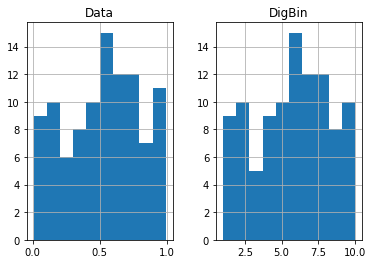

In [11]:
%matplotlib inline
df.hist() # now we can see before and after (left to right), should have the same shape
# note the x scale 0..12 vs 0..1.0

## Histograms

You can also use histogram to do binning for you:

In [12]:
binH = (np.histogram(data, bins, weights = data)[0] / np.histogram(data, bins)[0])

len(binH), binH # where binH is he mean of the values in each bin

(10,
 array([0.04040002, 0.14799998, 0.2564637 , 0.35427159, 0.44897324,
        0.54339197, 0.63648436, 0.75179231, 0.84773691, 0.94401007]))

## Using scipy:

In [13]:
# import numpy as np
from scipy.stats import binned_statistic
# we use the same data
binS = binned_statistic(data, data, bins = 10, range = (0, 1))[0]

### What is binned_statistic doing?

bin_count, bin_edges, bin_number

In [14]:
bc, be, bn = binned_statistic(data, data, statistic = 'count', bins = 10)

In [15]:
bc #, bc.sum() # =100

array([ 9., 10.,  6.,  8., 10., 15., 12., 12.,  7., 11.])

In [16]:
be # the edges, not so tidy...

array([0.00620852, 0.10479581, 0.20338311, 0.3019704 , 0.4005577 ,
       0.49914499, 0.59773229, 0.69631958, 0.79490688, 0.89349417,
       0.99208147])

In [17]:
bn # the bins

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3, 10,  5,  6,  1,  3,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7])

In [18]:
df["SciBin"] = bn # put side by side with the previous df

In [19]:
df.sort_values("Data")

,Data,DigBin,SciBin
78,0.006209,1,1
53,0.006764,1,1
17,0.013768,1,1
46,0.043324,1,1
42,0.047355,1,1
...,...,...,...
93,0.951429,10,10
8,0.958139,10,10
58,0.958802,10,10
67,0.982005,10,10


array([[<AxesSubplot:title={'center':'Data'}>,
        <AxesSubplot:title={'center':'DigBin'}>],
       [<AxesSubplot:title={'center':'SciBin'}>, <AxesSubplot:>]],
      dtype=object)

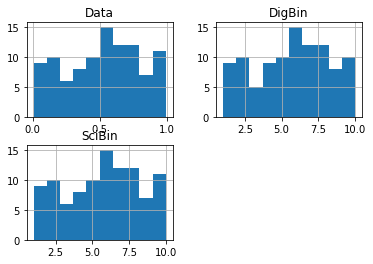

In [20]:
df.hist() # before and after again

(<AxesSubplot:>, <AxesSubplot:>)

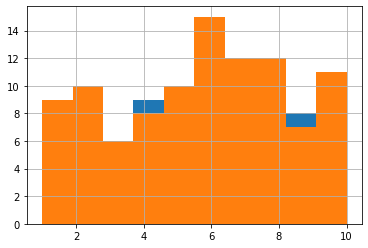

In [21]:
df.DigBin.hist(), df.SciBin.hist() # couple of blue peekers

(<AxesSubplot:>, <AxesSubplot:>)

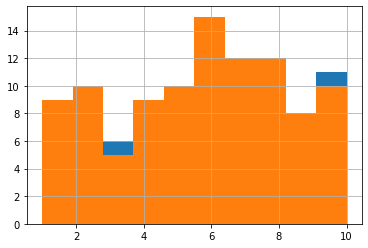

In [22]:
# do it the other way
df.SciBin.hist() ,df.DigBin.hist()

## Using Pandas Cut

In [23]:
ages = [20, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

# Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. 
# To do so, you can use 'cut', a function in pandas:
bins = [18, 25, 35, 60, 100] # as above 5 numbers give us 4 bins
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [24]:
# cats is a struture showing which bin the values were placed in (the first three are 18-25)
# then the total of the data (12), which is just:
len(ages)
# then the categories or bins, as specified

12

In [25]:
cats.codes # 0 is the first bin, 3 the last

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [26]:
cats.categories # the names, note the use of '(' and ']'
# '(' means open, '[' means closed, or inclusive, exclusive

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [27]:
pd.value_counts(cats) # and we can see there's only 1 60-100

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

which side is closed can be changed

In [28]:
cats2 = pd.cut(ages, [18, 26, 36, 61, 100], right = True)

In [29]:
pd.value_counts(cats2) # now 26 is in 18 - 26, 61 is in 36 - 61

(18, 26]     6
(36, 61]     4
(26, 36]     2
(61, 100]    0
dtype: int64

In [30]:
# want your own bin names?
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
cats = pd.cut(ages, bins, labels = group_names)
cats

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

If you pass cut an integer number of bins instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data. Consider the case of some uniformly distributed data chopped into tenths same data as above, 100 randoms

In [31]:
pd.cut(data, 10, precision = 5)

[(0.1048, 0.20338], (0.59773, 0.69632], (0.40056, 0.49914], (0.69632, 0.79491], (0.69632, 0.79491], ..., (0.49914, 0.59773], (0.49914, 0.59773], (0.79491, 0.89349], (0.0052226, 0.1048], (0.59773, 0.69632]]
Length: 100
Categories (10, interval[float64, right]): [(0.0052226, 0.1048] < (0.1048, 0.20338] < (0.20338, 0.30197] < (0.30197, 0.40056] ... (0.59773, 0.69632] < (0.69632, 0.79491] < (0.79491, 0.89349] < (0.89349, 0.99208]]

In [32]:
bincut = pd.cut(data, 10, precision = 5)

In [33]:
bincut.codes # notice 0 to 9 (not 1 to 10) for bins, so they're out of synch by 1

array([1, 6, 4, 7, 7, 2, 2, 8, 9, 8, 3, 5, 6, 7, 3, 5, 5, 0, 7, 8, 3, 6,
       0, 3, 9, 6, 3, 7, 3, 5, 8, 4, 8, 1, 7, 7, 2, 9, 4, 9, 0, 1, 0, 6,
       5, 5, 0, 5, 3, 5, 1, 6, 5, 0, 6, 9, 7, 9, 9, 7, 2, 6, 4, 1, 3, 0,
       4, 9, 1, 1, 7, 5, 4, 1, 2, 9, 4, 5, 0, 2, 4, 6, 9, 6, 7, 1, 7, 8,
       6, 4, 1, 5, 5, 9, 4, 5, 5, 8, 0, 6], dtype=int8)

In [34]:
df.head()

,Data,DigBin,SciBin
0,0.191519,2,2
1,0.622109,7,7
2,0.437728,5,5
3,0.785359,8,8
4,0.779976,8,8


In [35]:
bincut.codes + 1 # hack them into order

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3, 10,  5,  6,  1,  3,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7],
      dtype=int8)

In [36]:
df['BinCut'] = bincut.codes + 1
df.head() # are they the same? 

,Data,DigBin,SciBin,BinCut
0,0.191519,2,2,2
1,0.622109,7,7,7
2,0.437728,5,5,5
3,0.785359,8,8,8
4,0.779976,8,8,8


array([[<AxesSubplot:title={'center':'Data'}>,
        <AxesSubplot:title={'center':'DigBin'}>],
       [<AxesSubplot:title={'center':'SciBin'}>,
        <AxesSubplot:title={'center':'BinCut'}>]], dtype=object)

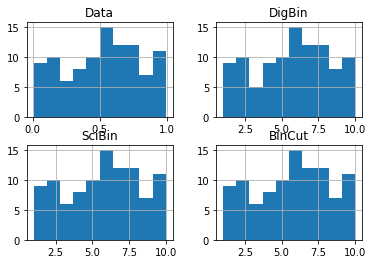

In [37]:
df.hist()

A closely related function, qcut, bins the data based on sample quantiles. Depending on the distribution of the data, using cut will not usually result in each bin having the same number of data points. Since qcut uses sample quantiles instead, by definition you will obtain roughly equal-size bins:

In [38]:
catsq = pd.qcut(data, 4) # Cut into quartiles
pd.value_counts(catsq) # 25 in each, means the edges/bins are not likely to be round or 'tidy' numbers

(0.00521, 0.313]    25
(0.313, 0.536]      25
(0.536, 0.74]       25
(0.74, 0.992]       25
dtype: int64

In [39]:
catsq

[(0.00521, 0.313], (0.536, 0.74], (0.313, 0.536], (0.74, 0.992], (0.74, 0.992], ..., (0.313, 0.536], (0.536, 0.74], (0.74, 0.992], (0.00521, 0.313], (0.536, 0.74]]
Length: 100
Categories (4, interval[float64, right]): [(0.00521, 0.313] < (0.313, 0.536] < (0.536, 0.74] < (0.74, 0.992]]

In [40]:
# first one is 0.00621, 0.313, should match the min value
data.min()

0.006208516587129398

In [41]:
# Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive):
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.111, 0.536], (0.536, 0.901], (0.111, 0.536], (0.536, 0.901], (0.536, 0.901], ..., (0.111, 0.536], (0.536, 0.901], (0.536, 0.901], (0.00521, 0.111], (0.536, 0.901]]
Length: 100
Categories (4, interval[float64, right]): [(0.00521, 0.111] < (0.111, 0.536] < (0.536, 0.901] < (0.901, 0.992]]

In [42]:
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

(0.111, 0.536]      40
(0.536, 0.901]      40
(0.00521, 0.111]    10
(0.901, 0.992]      10
dtype: int64